In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Análisis de Spotify
Preguntas interesantes para considerar:
- El objetivo es poder estimar si un tema nuevo del gusto de la persona que tiene esta playlist activa. En este caso la variable label corresponde a nuestra variable de salida a analizar

In [2]:
# Análisis exploratorio inicial
playlist = pd.read_csv('data_playlist.csv')
playlist.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [42]:
playlist.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [3]:
# Vemos primero el tipo de información que tiene cada variable
print("columnas, filas: ", playlist.shape, "\n")
playlist.info()

columnas, filas:  (750, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


De `.info()` podemos sacar que:
- No existen valores no nulos, por lo tanto, no habría que rellenarlos.
- Todos los features son numéricos, aunque no podríamos especificar el tipo todavía.

#### Acousticness

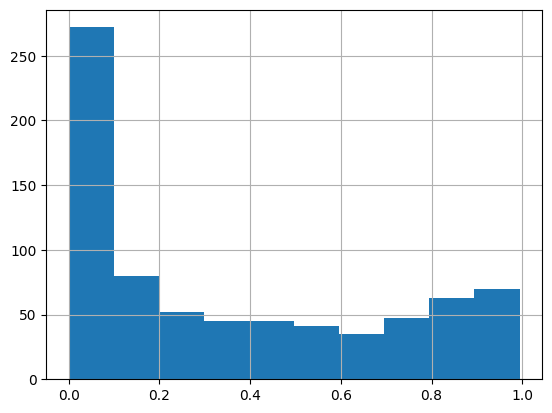

In [4]:
playlist.acousticness.hist();

- Valores continuos entre 0 y 1.
- La mayoría de los valores son bajos.
- A priori, no tiene una fistribución conocida.

#### Danceability

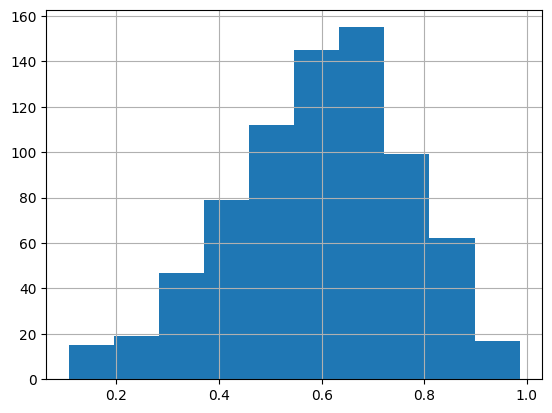

In [5]:
playlist.danceability.hist();

- Valores continuos entre 0 y 1.
- Tiene skewness.

#### Duration

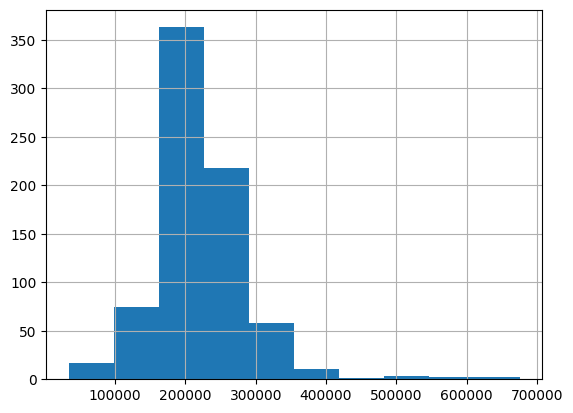

In [6]:
playlist.duration.hist();

#### Energy

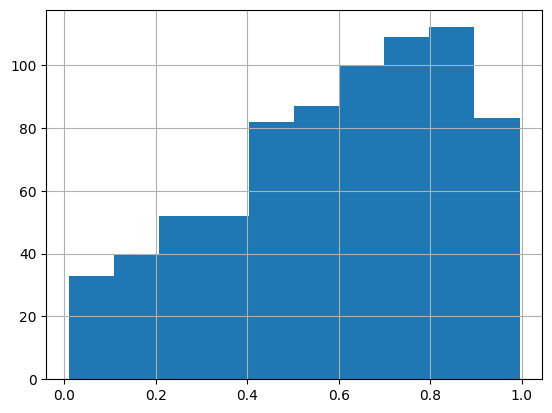

In [7]:
playlist.energy.hist();

#### Instrumentalness

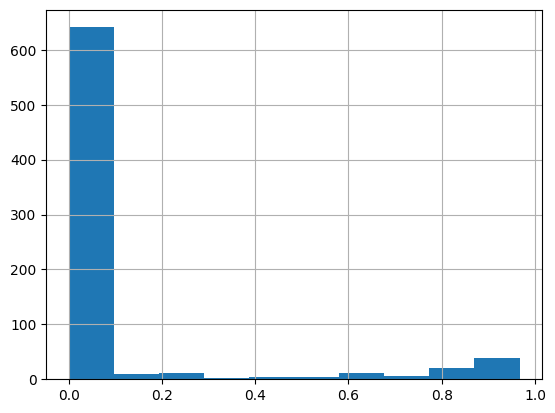

In [8]:
playlist.instrumentalness.hist();

#### Key

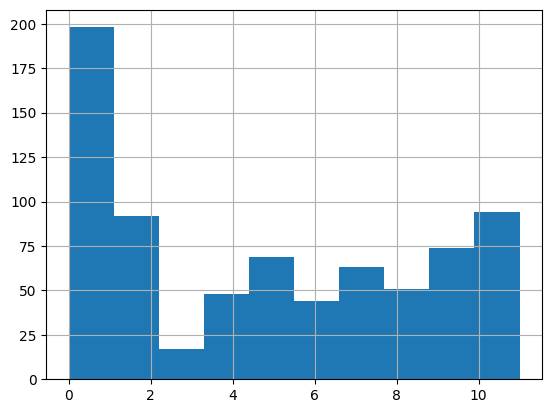

In [9]:
playlist.key.hist();

In [34]:
playlist.key.value_counts().sort_values(ascending=False)

key
0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: count, dtype: int64

#### Liveness

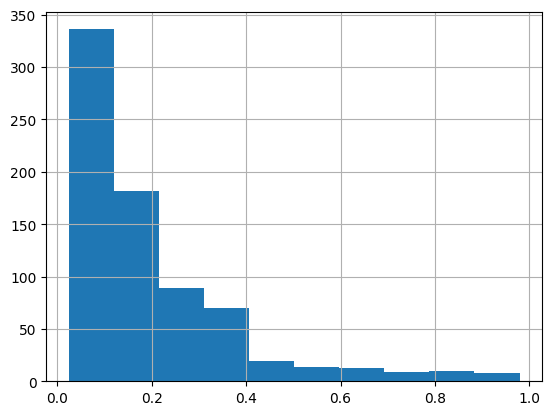

In [11]:
playlist.liveness.hist();

#### Loudness

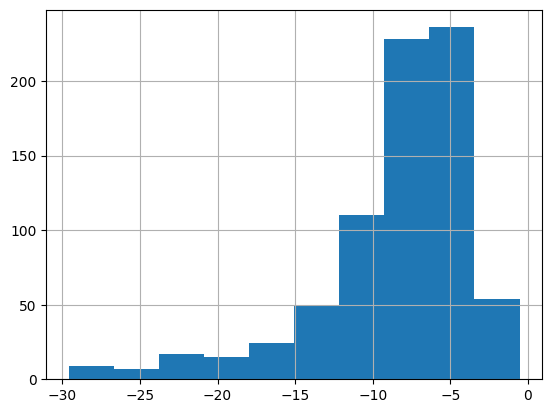

In [12]:
playlist.loudness.hist();

#### Mode

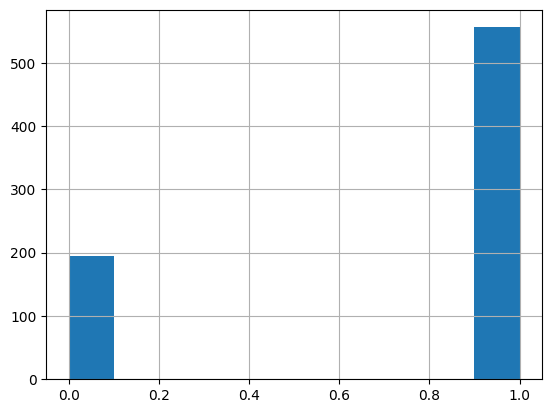

In [13]:
playlist['mode'].hist();

In [14]:
playlist['mode'].value_counts()

mode
1    556
0    194
Name: count, dtype: int64

#### Speechiness

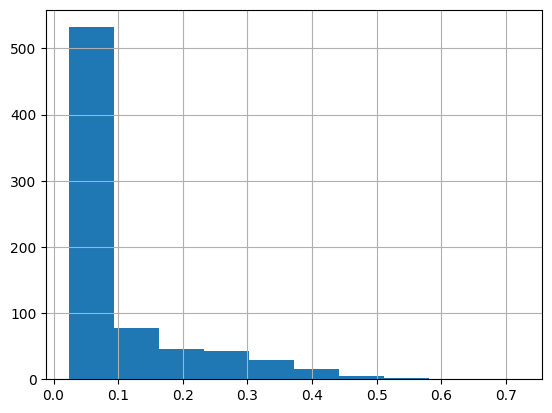

In [15]:
playlist.speechiness.hist();

#### Tempo

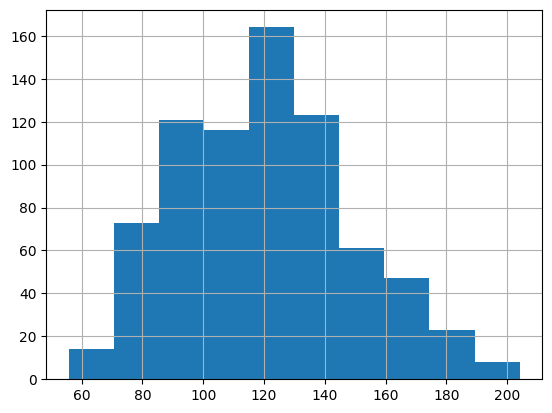

In [16]:
playlist.tempo.hist();

#### Time Signature

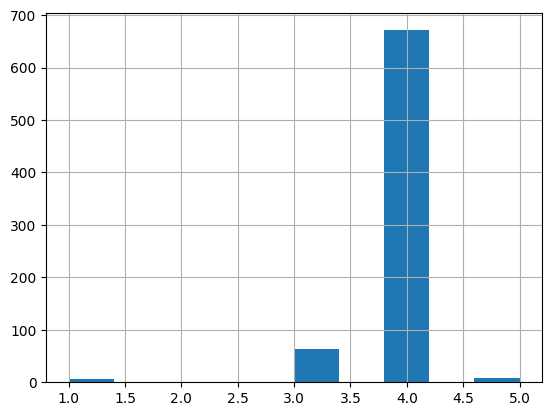

In [17]:
playlist.time_signature.hist();

In [18]:
playlist.time_signature.value_counts()

time_signature
4    671
3     64
5      9
1      6
Name: count, dtype: int64

#### Valence

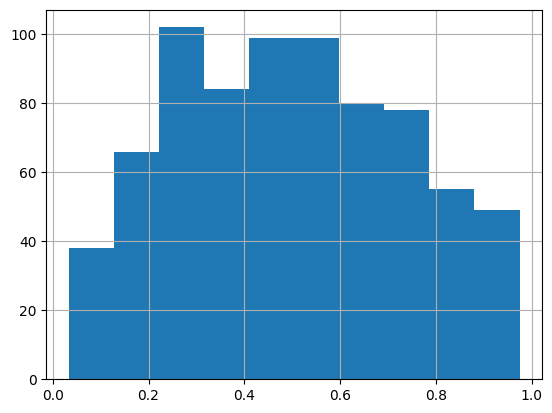

In [19]:
playlist.valence.hist();

#### Label

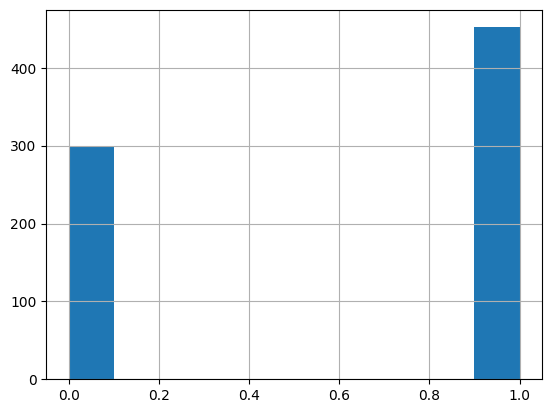

In [20]:
playlist.label.hist();

In [21]:
playlist.label.value_counts()

label
1    452
0    298
Name: count, dtype: int64

- No se encuentra balanceado el label.

### Análisis detallado

In [22]:
playlist.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [23]:
numericas = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categoricas = ['key', 'mode', 'time_signature']

In [24]:
playlist[numericas].skew().sort_values()

loudness           -1.693115
energy             -0.458765
danceability       -0.311981
valence             0.104812
tempo               0.334763
acousticness        0.534804
duration            1.576231
speechiness         2.040370
liveness            2.156240
instrumentalness    2.488166
dtype: float64

In [25]:
# Usamos una función útil para ver todas las distribuciones
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

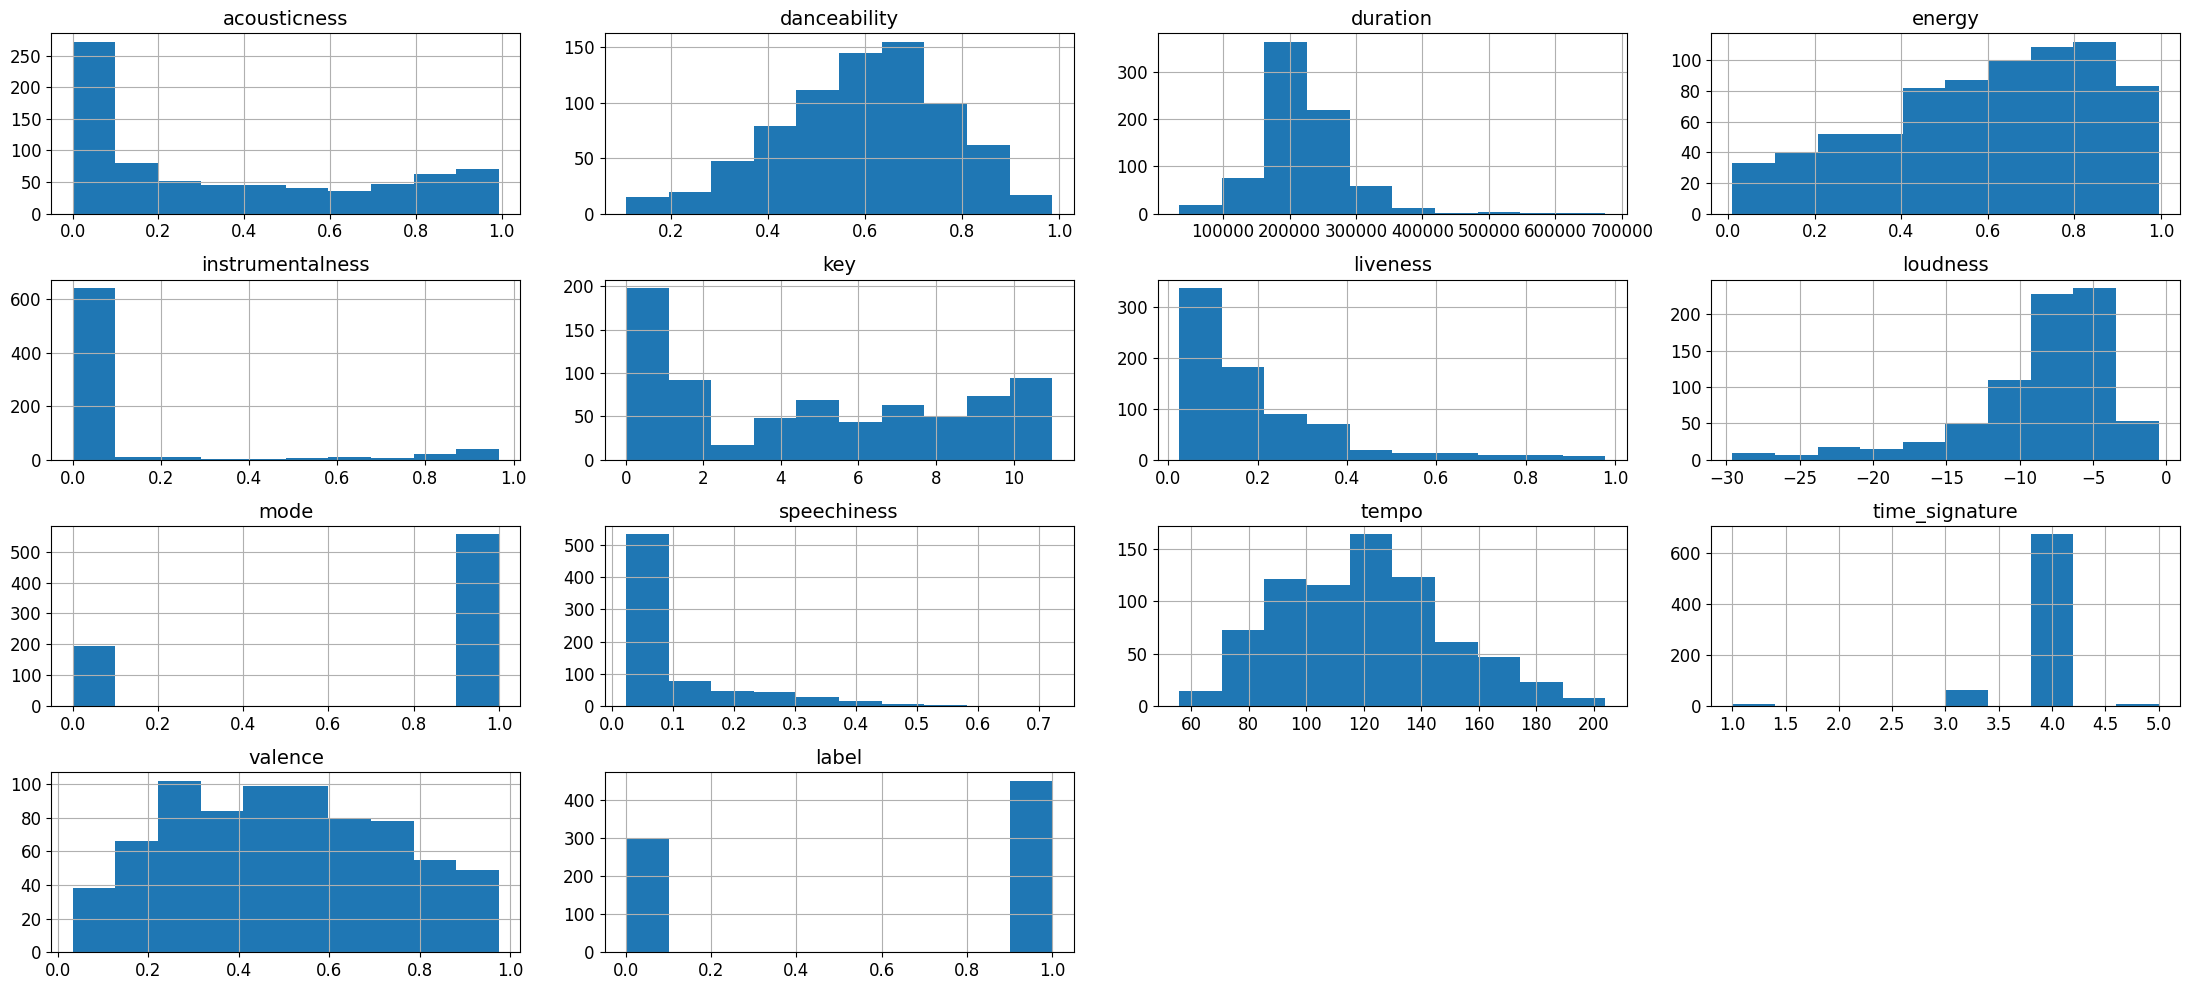

In [26]:
display_dataset_distributions(playlist)

In [41]:
# Vemos como está la correlación de las variables
playlist.corr()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
acousticness,1.000000,-0.417974,0.054988,-0.781691,0.331659,-0.065184,-0.140326,-0.695163,0.111980,-0.215614,-0.149472,-0.205854,-0.233485,0.479307
danceability,-0.417974,1.000000,-0.231120,0.360971,-0.238865,0.055302,-0.115735,0.396021,-0.058461,0.272283,0.064002,0.222486,0.483361,-0.368501
duration,0.054988,-0.231120,1.000000,-0.093435,0.161803,-0.002089,-0.002576,-0.179952,-0.011989,-0.110645,-0.052321,-0.003030,-0.256984,0.138562
energy,-0.781691,0.360971,-0.093435,1.000000,-0.267846,0.066970,0.235887,0.830081,-0.102567,0.173371,0.197741,0.241667,0.364495,-0.459088
instrumentalness,0.331659,-0.238865,0.161803,-0.267846,1.000000,-0.020726,-0.050720,-0.429529,-0.032180,-0.145104,-0.081531,-0.024597,-0.228774,0.133523
key,-0.065184,0.055302,-0.002089,0.066970,-0.020726,1.000000,-0.055710,0.009126,-0.158468,0.081137,-0.084476,0.096863,0.068146,-0.075631
liveness,-0.140326,-0.115735,-0.002576,0.235887,-0.050720,-0.055710,1.000000,0.154176,-0.023585,0.106747,-0.008093,0.037201,0.051110,-0.108682
loudness,-0.695163,0.396021,-0.179952,0.830081,-0.429529,0.009126,0.154176,1.000000,-0.048111,0.188873,0.188127,0.169130,0.294852,-0.424345
mode,0.111980,-0.058461,-0.011989,-0.102567,-0.032180,-0.158468,-0.023585,-0.048111,1.000000,-0.118390,0.013911,-0.044799,0.051939,0.080375
speechiness,-0.215614,0.272283,-0.110645,0.173371,-0.145104,0.081137,0.106747,0.188873,-0.118390,1.000000,0.139993,0.088062,0.101257,-0.480931


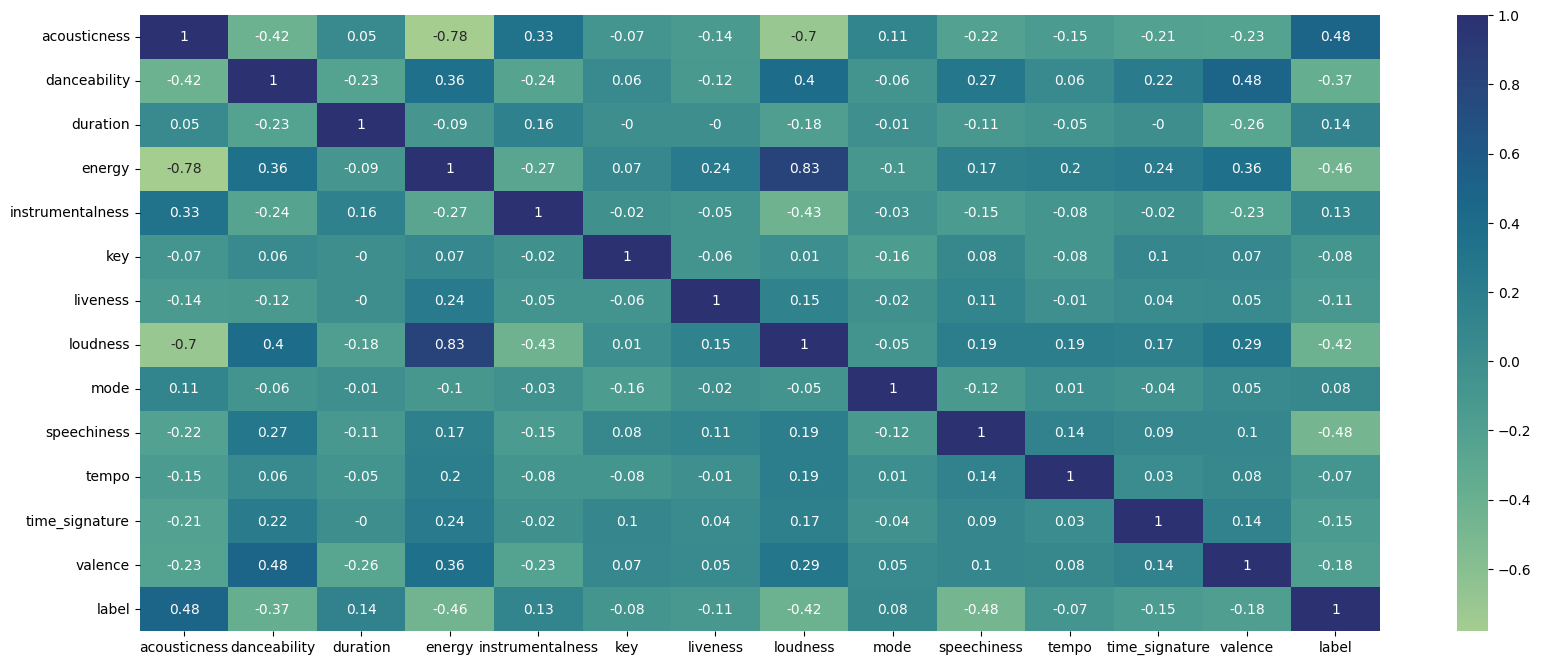

In [48]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = playlist.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes, cmap='crest');

- Podemos decir que con un valor de correlación arriba del 75%, esos dos features tienen cierta correlación.
- Podemos tomar `acousticness` con `energy` y `loudness` con `energy`.

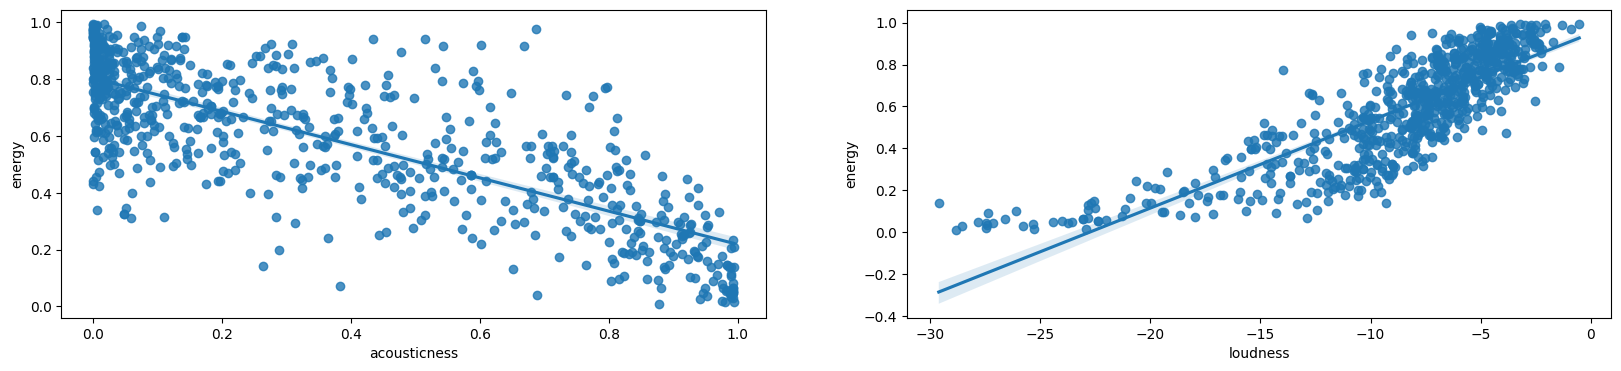

In [45]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.regplot(x="acousticness", y="energy", data=playlist, order=1,ax=axes[0])
sns.regplot(x="loudness", y="energy", data=playlist, order=1,ax=axes[1]);

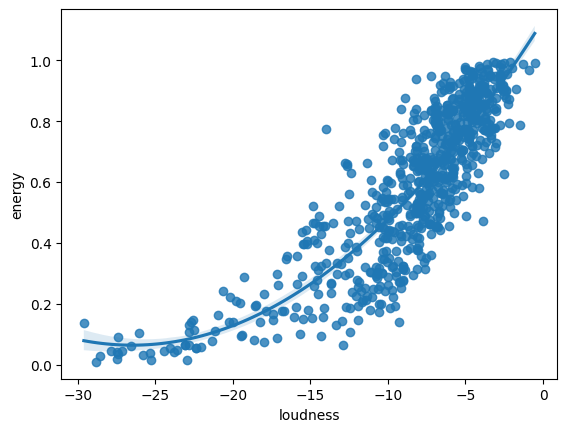

In [47]:
# Vemos si energy y loudness tienen una relación de orden mayor
sns.regplot(x="loudness", y="energy", data=playlist, order=2);

- Se adapta mejor a este modelo de orden 2.

- Ya en un grado menor, con la correlación en 70% podemos tomar las variables `loudness` y `acousticness`. Aunque el resultado no se ve prometedor.

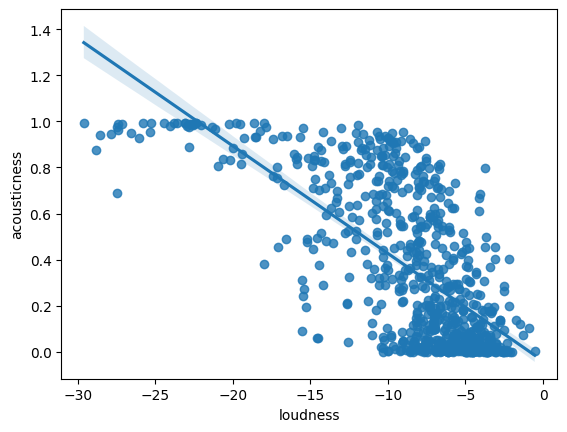

In [46]:
sns.regplot(x="loudness", y="acousticness", data=playlist, order=1);

### Identificación de variables

In [27]:
# Variables de entrada
entrada = playlist.drop('label', axis=1)
salida = playlist.label

#### Boxplot

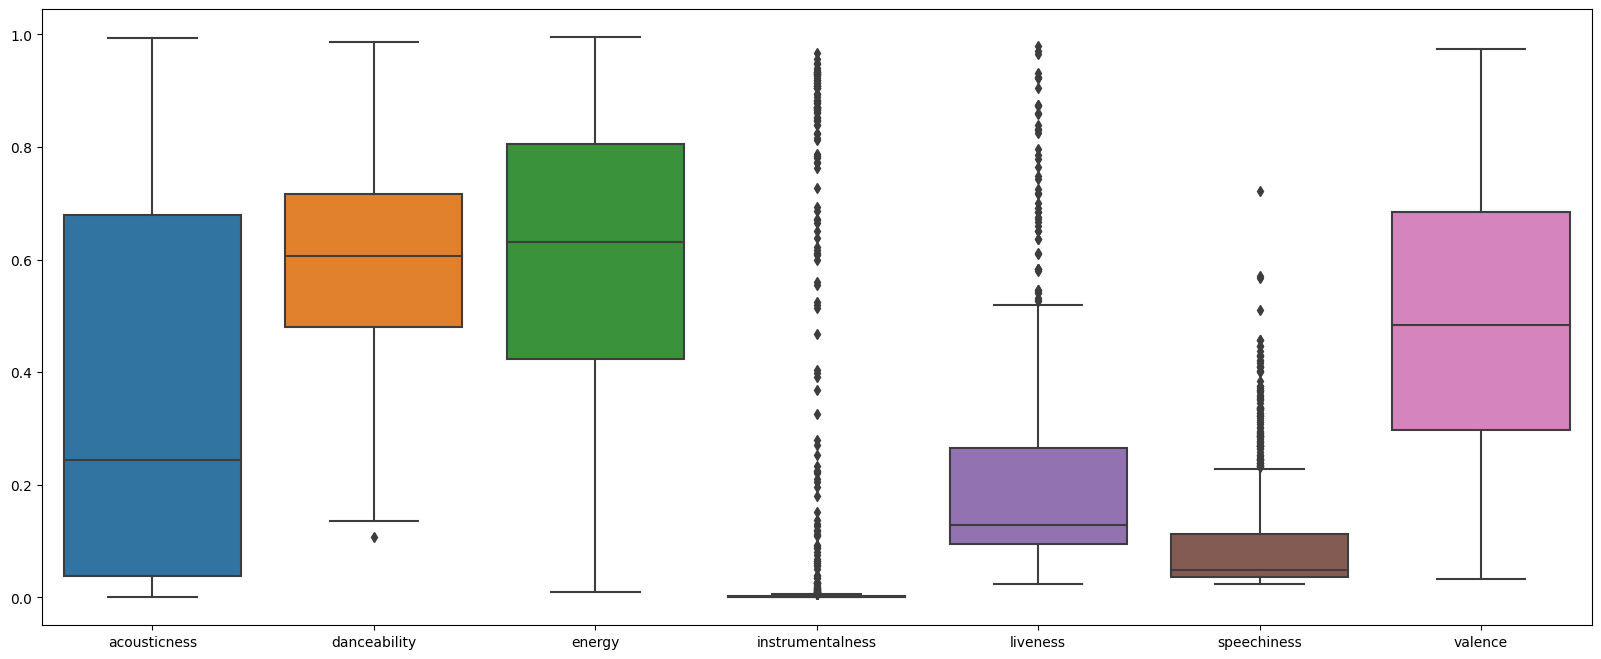

In [28]:
entre_0y1 = playlist[numericas].drop(['duration','loudness', 'tempo'], axis=1)
plt.figure(figsize=(20,8))
sns.boxplot(entre_0y1);

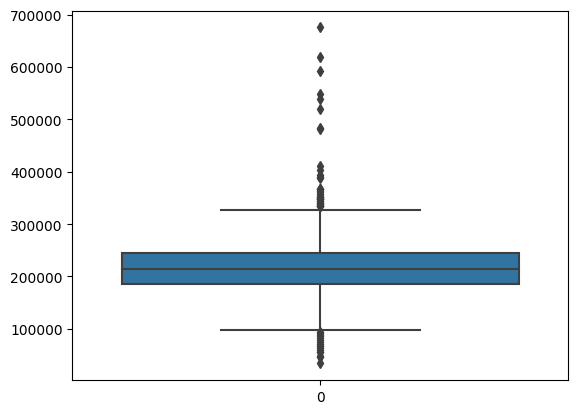

In [29]:
sns.boxplot(data=playlist['duration']);

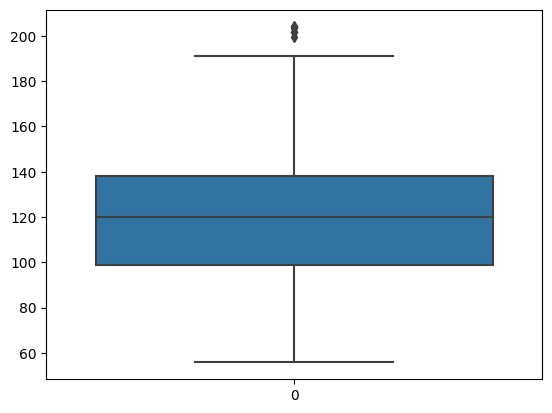

In [30]:
sns.boxplot(data=playlist['tempo']);

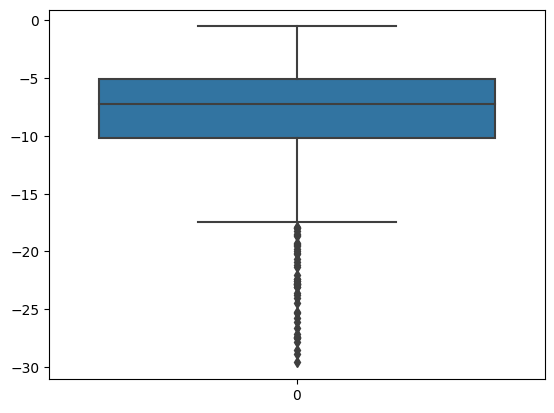

In [31]:
sns.boxplot(data=playlist['loudness']);